In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AE_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	58
float64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	29
float64		column 6	0
float64		column 7	29
float64		column 8	87
float64		column 9	58
float64		column 10	58
float64		column 11	29
float64		column 12	29
float64		column 13	29
float64		column 14	87
float64		column 15	174
float64		column 16	58
float64		column 17	58
float64		column 18	116
float64		column 19	0
float64		column 20	116
float64		column 21	29
float64		column 22	87
float64		column 23	149
float64		column 24	87
float64		column 25	319
float64		column 26	584
float64		column 27	29
float64		column 28	497
float64		column 29	377
float64		column 30	613
float64		column 31	551
float64		column 32	729
float64		column 33	29
float64		column 34	932
float64		column 35	700
float64		column 36	725
float64		column 37	91
float64		column 38	174
float64		column 39	236
float64		column 40	787
float64		column 41	58
float64		column 42	352
float64		column 43	410
float64		co

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4539.000000,4597.000000,4597.000000,4597.000000,4568.000000,4597.000000,4568.000000,4510.000000,4539.000000,4539.000000,...,4539.000000,4249.000000,4452.000000,4448.000000,4481.00000,4336.000000,4075.000000,4162.000000,4158.000000,4075.000000
mean,0.104453,0.213200,0.280433,0.065482,0.312680,0.095928,0.114597,0.105632,0.089934,0.239394,...,0.031324,0.039267,0.137193,0.017106,0.27126,0.076428,0.044906,5.047324,52.053872,284.327607
std,0.305147,1.291121,0.504121,1.395757,0.672889,0.273934,0.392565,0.403033,0.278910,0.644486,...,0.285720,0.250712,0.230648,0.110848,0.82404,0.249599,0.451510,30.187374,199.274986,602.363137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.600000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.00000,0.000000,0.000000,2.284500,15.000000,96.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188250,0.000000,0.32100,0.051250,0.000000,3.731750,44.000000,267.500000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.47800,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

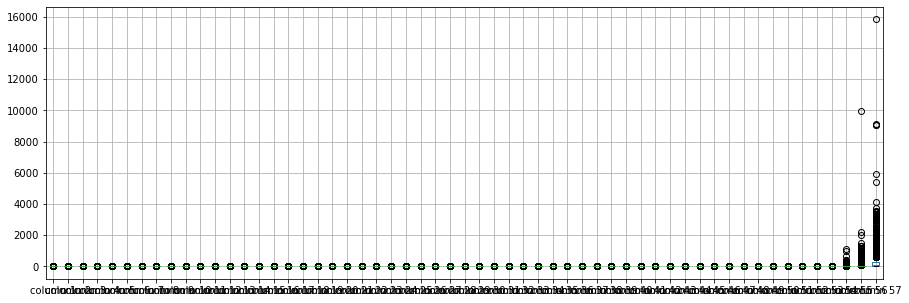

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104453
column 2       0.213200
column 3       0.280433
column 4       0.065482
column 5       0.312680
column 6       0.095928
column 7       0.114597
column 8       0.105632
column 9       0.089934
column 10      0.239394
column 11      0.059715
column 12      0.542616
column 13      0.094240
column 14      0.058486
column 15      0.049261
column 16      0.249009
column 17      0.143003
column 18      0.184133
column 19      1.661710
column 20      0.086124
column 21      0.809299
column 22      0.121417
column 23      0.102192
column 24      0.095173
column 25      0.546512
column 26      0.260154
column 27      0.771806
column 28      0.120637
column 29      0.096571
column 30      0.102952
column 31      0.061419
column 32      0.043961
column 33      0.097848
column 34      0.046169
column 35      0.107557
column 36      0.095648
column 37      0.137679
column 38      0.013335
column 39      0.079074
column 40      0.062890
column 41      0.043382
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016367,0.067398,0.013411,0.025972,0.058267,0.008207,-0.005499,0.105100,0.039679,...,-0.017043,-0.026151,-0.016439,-0.033050,0.058514,0.122499,-0.007021,0.043923,0.056050,0.086754
column 2,-0.016367,1.000000,-0.033469,-0.006930,-0.023146,-0.024857,0.003762,-0.015491,-0.003742,0.028904,...,-0.015475,-0.007220,-0.056979,-0.017890,-0.014326,-0.010670,0.002824,0.005003,-0.000716,-0.024495
column 3,0.067398,-0.033469,1.000000,-0.020235,0.078660,0.087841,0.036048,0.009963,0.093342,0.033116,...,-0.025258,-0.033123,-0.009401,-0.035606,0.106829,0.087660,-0.000423,0.083693,0.105086,0.066766
column 4,0.013411,-0.006930,-0.020235,1.000000,0.003216,-0.010019,0.019752,0.010281,-0.002379,-0.004982,...,-0.001825,-0.000747,-0.012168,-0.007231,-0.003508,0.010696,0.000171,0.003998,0.021869,0.020278
column 5,0.025972,-0.023146,0.078660,0.003216,1.000000,0.053783,0.147592,0.029377,0.021597,0.027354,...,-0.031256,-0.031791,-0.048647,-0.026461,0.023669,0.042044,0.004717,0.049948,0.051258,0.003090
column 6,0.058267,-0.024857,0.087841,-0.010019,0.053783,1.000000,0.060263,0.078074,0.119009,0.005556,...,-0.030842,-0.018140,-0.004903,-0.016778,0.064714,0.106672,0.020555,-0.008891,0.086619,0.077555
column 7,0.008207,0.003762,0.036048,0.019752,0.147592,0.060263,1.000000,0.040000,0.050284,0.058019,...,-0.031075,-0.034334,-0.057630,-0.027318,0.052445,0.071577,0.049173,0.046220,0.059002,-0.012983
column 8,-0.005499,-0.015491,0.009963,0.010281,0.029377,0.078074,0.040000,1.000000,0.103686,0.077198,...,-0.020918,-0.027039,-0.033220,-0.019692,0.025841,0.058915,-0.008829,0.013314,0.031850,0.036635
column 9,0.105100,-0.003742,0.093342,-0.002379,0.021597,0.119009,0.050284,0.103686,1.000000,0.131483,...,-0.025062,-0.016920,-0.033458,0.011337,0.042955,0.140610,0.000673,0.110481,0.186371,0.245474
column 10,0.039679,0.028904,0.033116,-0.004982,0.027354,0.005556,0.058019,0.077198,0.131483,1.000000,...,-0.015986,0.013544,0.007203,0.008949,0.035377,0.069471,0.047978,0.075734,0.092076,0.087238


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 601.2835786666604
Epoch: 1 , loss: 598.9530516567961
Epoch: 2 , loss: 598.9041008500687
Epoch: 3 , loss: 597.0875780590735
Epoch: 4 , loss: 596.4234127350385
Epoch: 5 , loss: 592.5176569975212
Epoch: 6 , loss: 600.1599702203731
Epoch: 7 , loss: 600.7321186132132
Epoch: 8 , loss: 598.6372071641663
Epoch: 9 , loss: 599.8940070813542
Epoch: 10 , loss: 597.5335375157798
Epoch: 11 , loss: 600.1769126865506
Epoch: 12 , loss: 595.7932844527508
Epoch: 13 , loss: 599.8412637212135
Epoch: 14 , loss: 591.434322955301
Epoch: 15 , loss: 589.8390511170497
Epoch: 16 , loss: 591.3854033838996
Epoch: 17 , loss: 583.5397071971295
Epoch: 18 , loss: 575.7171618099412
Epoch: 19 , loss: 551.9438338861232
Epoch: 20 , loss: 527.7767115470009
Epoch: 21 , loss: 512.5579304711744
Epoch: 22 , loss: 502.6453717593947
Epoch: 23 , loss: 510.6314558501028
Epoch: 24 , loss: 516.6737245034673
Epoch: 25 , loss: 500.10011772660846
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

15788.876068564126

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3326869778257298

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756000,61.0,278.000000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114000,101.0,1028.000000
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537000,40.0,191.000000
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000000,15.0,54.000000
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671000,4.0,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121000,15.0,103.000000
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043000,15.0,70.000000
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837000,12.0,68.000000
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189000,5.0,69.000000


In [21]:
imputations[-1].to_excel("Spam_AE_1(imp).xlsx", index=False, header=False)